### ABOUT PROJECT GUTENBERG

Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library. Most of the items in its collection are the full texts of public domain books. 

Its a repository of Over 60,000 book.

Link to the project : https://www.gutenberg.org/

#### OUR TASK

Patterns within written text are not the same across all authors or languages.
This allows linguists to study the language of origin or potential authorship of texts where these characteristics are not directly known such as the Federalist Papers of the American Revolution

In this blog, we will examine the properties of individual books in a book collection from various authors and various languages. More specifically, we will look at book lengths, number of unique words, and how these attributes cluster by language of or authorship.

### Defining count_words 

In [11]:
text = "Hi, welcome to the project Gutenberg."

Lets define a function to count words in a sentence.

In [13]:
def count_words(text):
    """Count the number of times each word occurs in text. Show number count in dictionary.Skip punctuation.Lower case""" 
    #adding docstring to function

    word_counts = {}
    
    for word in text.split(" "):          #splitted the words with blanks and do a loop over loop
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

print(count_words(text))

{'Hi,': 1, 'welcome': 1, 'to': 1, 'the': 1, 'project': 1, 'Gutenberg.': 1}


#### Addressing the issues

Looking at the dictionary, one obvious shortcoming of our current routine is that it includes punctuation like periods, 
or full stops, it does not consider caps as part of the word.This would lead to an inflation of the word count.

To address these issues, we're first going to turn the text into lower case. 

Addressing punctuation is a bit more complex. Our strategy is to first specify all the punctuation marks that we'd like to skip, and then loop over that container and replace every occurrence of a punctuation mark with an empty string.

In [17]:
text = "Hi, this is Project Gutenberg. Nice to meet you. This is a tutorial blog of Gutenberg. "

def count_words(text):
    """Count the number of times each word occurs in text. Show number count in dictionary.Skip punctuation.Lower case"""  #adding docstring to function
    text = text.lower()
    skips = [".",",", ":", ";","'",'"']      #fixing the problem
    for ch in skips:
        text = text.replace(ch,"")

    word_counts = {}
    for word in text.split(" "):          #splitted the words with blanks and do a loop over loop
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

print(count_words(text))

{'hi': 1, 'this': 2, 'is': 2, 'project': 1, 'gutenberg': 2, 'nice': 1, 'to': 1, 'meet': 1, 'you': 1, 'a': 1, 'tutorial': 1, 'blog': 1, 'of': 1, '': 1}


It's useful to be able to write your own counting routine like we just did. 

However, counting the frequency of objects is such a common operation that Python provides what is known as a counter tool to support rabbit tallies. We first need to import it from the collections module, which provides many additional high performance data types.

#### Updated Fast code : Using counter function

In [18]:
from collections import Counter

def count_words_fast(text):
    """Count the number of times each word occurs in text. Show number count in dictionary.Skip punctuation.Lower case"""  #adding docstring to function
    text = text.lower()
    skips = [".",",", ":", ";","'",'"']
    for ch in skips:
        text = text.replace(ch,"")

    word_counts = Counter(text.split(" "))
    return word_counts

print(count_words_fast(text))
print(count_words_fast(text) == count_words(text))     #True but now faster

Counter({'this': 2, 'is': 2, 'gutenberg': 2, 'hi': 1, 'project': 1, 'nice': 1, 'to': 1, 'meet': 1, 'you': 1, 'a': 1, 'tutorial': 1, 'blog': 1, 'of': 1, '': 1})
True


count_words_fast(text) is equal to count_words(text) but is now much faster

#### READING A COMPLETE BOOK 

Character encoding refers to the process how computer encodes certain characters. In this case, we'll use what is called UTF-8 encoding, which is the dominant character encoding for the web.

You can download any book from project  Gutenberg website. In this blog I have particularly referred to Shakespeare Books.

You can also download the book I refer from here : https://github.com/shelvi31/Project-Gutenberg-Language-Processing

In [24]:
def read_book(title_path): 
    """Read a book and return it as a string""" 
    with open(title_path,"r",encoding = "utf8") as current_file:            
        text = current_file.read() 
        text = text.replace("\n","").replace("\r","") 
    return text 

#inputting location of downloaded utf8 file from gutenberg site 

text1 = read_book(r"C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython\English\shakespeare\Romeo and Juliet.txt") 
print(len(text1)) 

169275


Using find method : i am looking out for a few words i know exist in my book

In [25]:
ind = text1.find("in a name")        
print(ind) 
sample_text1 = text1[ind : ind +1000] 
print(sample_text1)

42764
in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consider

### Computing Word Frequency Statistics

We would like to know how many unique words there are in a given book. We'd also like to return the frequencies of each word. 

In [26]:
def word_stats(word_counts):
    """ return number of unique words and word frequencies"""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique,counts)
text1 = read_book(r"C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython\English\shakespeare\Romeo and Juliet.txt")
word_counts = count_words(text1)
(num_unique,counts) = word_stats(word_counts)

5118
40776


#### Total No of unique words 

In [27]:
print(num_unique)

5118


#### Total number of words

In [28]:
print(sum(counts))    

40776


### Reading multiple book files simultaneously

In [30]:
import os
book_dir = (r"C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython")
print(os.listdir(book_dir))

['English', 'French', 'German', 'Portuguese']


I have 4 folders each having different books in a language namely 'English', 'French', 'German', 'Portuguese'

We first want to generate a list of the directories that are contained within our "BooksPython directory.
Since these directories will correspond to different languages, I am going to call the loop variable language

In [31]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):   

# we need to add the new directory  that we're currently in which is the language. We can do this by concatenating strings.
        for title in os.listdir(book_dir + "/" + language + "/" + author):
        
#our first for loop is looping over languages.The second for loop is looping over authors.And the third, the innermost for loop, is loopingover different titles, different books.
            input_file = book_dir + "/" + language + "/" + author + "/" + title
            print(input_file)
            
            text = read_book(input_file)
            (num_unique,counts) = word_stats(count_words(text))

C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/English/shakespeare/A Midsummer Night's Dream.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/English/shakespeare/Hamlet.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/English/shakespeare/Macbeth.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/English/shakespeare/Othello.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/English/shakespeare/Richard III.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/English/shakespeare/Romeo and Juliet.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/English/shakespeare/The Merchant of Venice.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/French/chevalier/L'a╠èle de sable.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/French/chevalier/L'enfer et le paradis de l'autre monde.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/French/chevalier/La capitaine.txt
C:\Users\

C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/Portuguese/branco/Livro de Consolac╠ºa╠âo.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/Portuguese/branco/O Olho de Vidro.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/Portuguese/branco/O que fazem mulheres.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/Portuguese/branco/O Regicida.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/Portuguese/branco/Scenas Contemporaneas.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/Portuguese/dinis/A Morgadinha dos Cannaviaes.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/Portuguese/dinis/Os fidalgos da Casa Mourisca.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/Portuguese/dinis/Uma fam┬░lia ingleza.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/Portuguese/Queir┬ós/A Cidade e as Serras.txt
C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython/Portuguese/Queir┬ós/

This read all the books i have in the 4 sub-folders under my BooksPython Directory.

### Reading Multiple Files

#### Using Pandas Data-frames for our code:

We first want to generate a list of the directories that are contained within our "Books" directory 
Since these directories will correspond to different languages,gonna call the loop variable language. We will:

- Learning how to navigate file directories and read in multiple files/books at once
- Briefly using pandas, which provides additional data structure and data analysis functionalities for Python

In [43]:
import os 
book_dir = (r"C:\Users\Shelvi Garg\Desktop\Code\data-science\BooksPython") 
print(os.listdir(book_dir))

['English', 'French', 'German', 'Portuguese']


In [44]:
import pandas as pd 
stats = pd.DataFrame( columns = ("language", "author","title", "length","unique"))   #table with these 5 coloumns 
title_num = 1  
for language in os.listdir(book_dir): 
    for author in os.listdir(book_dir + "/" + language):   # we need to add the new directory that we're currently in which is the language. We can do this by concatenating strings. 
        for title in os.listdir(book_dir + "/" + language + "/" + author):   #our first for loop is looping over languages.The second for loop is looping over authors.And the third, the innermost for loop, is loopingover different titles, different books. 
            input_file = book_dir + "/" + language + "/" + author + "/" + title 
            text = read_book(input_file) 
            stats.loc[title_num] = language , author.capitalize() , title.replace(".txt","") , sum(counts) , num_unique 
            title_num += 1 
            (num_unique, counts) = word_stats(count_words(text)) 


Printing Stats:

In [34]:
print(stats)         

       language       author                      title  length unique
1       English  Shakespeare  A Midsummer Night's Dream   30567   9700
2       English  Shakespeare                     Hamlet   16103   4345
3       English  Shakespeare                    Macbeth   28551   6776
4       English  Shakespeare                    Othello   16874   4780
5       English  Shakespeare                Richard III   26590   5898
..          ...          ...                        ...     ...    ...
98   Portuguese     Queir┬ós     O crime do padre Amaro   44293  13898
99   Portuguese     Queir┬ós                 O Mandarim  128630  29300
100  Portuguese     Queir┬ós            O Primo Bazilio   21440   7836
101  Portuguese     Queir┬ós                   Os Maias  107303  27644
102  Portuguese  Shakespeare                     Hamlet  195771  40665

[102 rows x 5 columns]


In [35]:
print(stats.head) 

<bound method NDFrame.head of        language       author                      title  length unique
1       English  Shakespeare  A Midsummer Night's Dream   30567   9700
2       English  Shakespeare                     Hamlet   16103   4345
3       English  Shakespeare                    Macbeth   28551   6776
4       English  Shakespeare                    Othello   16874   4780
5       English  Shakespeare                Richard III   26590   5898
..          ...          ...                        ...     ...    ...
98   Portuguese     Queir┬ós     O crime do padre Amaro   44293  13898
99   Portuguese     Queir┬ós                 O Mandarim  128630  29300
100  Portuguese     Queir┬ós            O Primo Bazilio   21440   7836
101  Portuguese     Queir┬ós                   Os Maias  107303  27644
102  Portuguese  Shakespeare                     Hamlet  195771  40665

[102 rows x 5 columns]>


In [36]:
print(stats.tail)

<bound method NDFrame.tail of        language       author                      title  length unique
1       English  Shakespeare  A Midsummer Night's Dream   30567   9700
2       English  Shakespeare                     Hamlet   16103   4345
3       English  Shakespeare                    Macbeth   28551   6776
4       English  Shakespeare                    Othello   16874   4780
5       English  Shakespeare                Richard III   26590   5898
..          ...          ...                        ...     ...    ...
98   Portuguese     Queir┬ós     O crime do padre Amaro   44293  13898
99   Portuguese     Queir┬ós                 O Mandarim  128630  29300
100  Portuguese     Queir┬ós            O Primo Bazilio   21440   7836
101  Portuguese     Queir┬ós                   Os Maias  107303  27644
102  Portuguese  Shakespeare                     Hamlet  195771  40665

[102 rows x 5 columns]>


#### Plotting our statistics 

We can easily extract specific columns from our pandas table using the names that we've given to those columns.

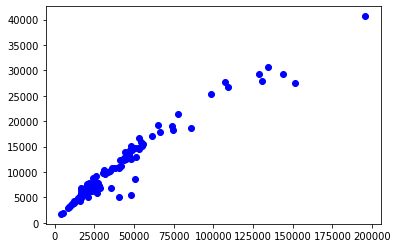

<Figure size 432x288 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
plt.plot(stats.length, stats.unique, "bo")
plt.show()
plt.savefig("gutenberg1.pdf")

#### Using matplotlib's loglog:

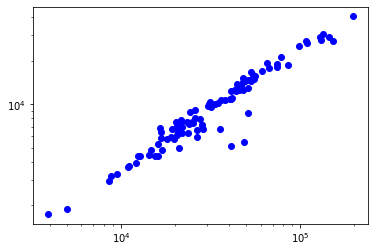

<Figure size 432x288 with 0 Axes>

In [48]:
plt.loglog(stats.length, stats.unique, "bo")
plt.show()
plt.savefig("gutenberg2.pdf")

### Plot As Per Book Language

#### Let's construct a plot using different colors for different languages.

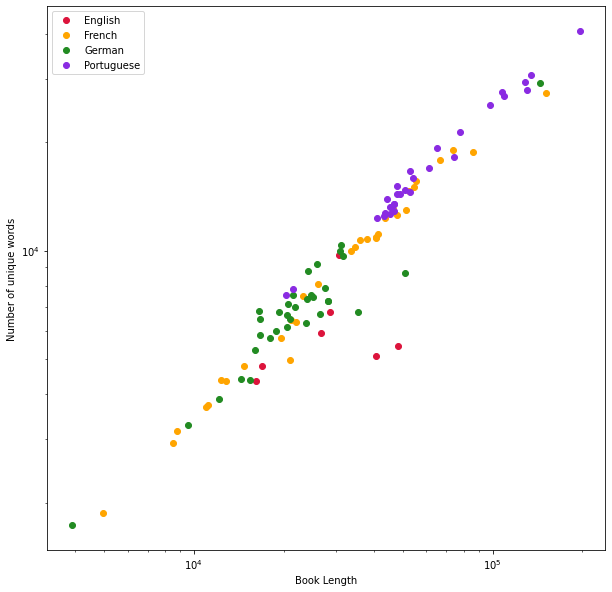

In [46]:

plt.figure(figsize = (10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length,subset.unique,"o",label = "English",color = "crimson")
subset = stats[stats.language == "French"]
plt.loglog(subset.length,subset.unique,"o",label = "French",color = "orange")
subset = stats[stats.language == "German"]
plt.loglog(subset.length,subset.unique,"o",label = "German",color = "forestgreen")
subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length,subset.unique,"o",label = "Portuguese",color = "blueviolet")
plt.legend()
plt.xlabel("Book Length")
plt.ylabel("Number of unique words")
plt.savefig("language_plot.pdf")
plt.show()